In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_style('darkgrid')

In [3]:
bac = pd.read_csv('Bachelor.csv')
fte = pd.read_csv('fteFallEnroll.csv')

In [4]:
datasets = [bac, fte]

__Drop unnecessary columns__

In [5]:
for dset in datasets:
    dset.drop(['Unnamed: 7','UnitID'], axis=1, inplace=True)

**Get sub-dataframe for extracting**

In [6]:
peers_bac = bac[bac['Institution Name'] != 'The University of Texas at San Antonio'].drop('Institution Name',axis=1)

In [7]:
peers_fte = fte[fte['Institution Name'] != 'The University of Texas at San Antonio'].drop('Institution Name',axis=1)

In [8]:
median_bac = { 'Year':[], 'Median':[] }
median_fte = { 'Year':[], 'Median':[] }

**Calculate medians for granted degrees and fte students and put them into dictionaries**

In [9]:
median_bac['Year'] = list(peers_bac.columns.values)
for column in peers_bac:
    median_bac['Median'].append(peers_bac[column].median())

In [10]:
median_bac

{'Year': ["Number of students receiving a Bachelor's degree (DRVC2016)",
  "Number of students receiving a Bachelor's degree (DRVC2015_RV)",
  "Number of students receiving a Bachelor's degree (DRVC2014_RV)",
  "Number of students receiving a Bachelor's degree (DRVC2013_RV)",
  "Number of students receiving a Bachelor's degree (DRVC2012_RV)"],
 'Median': [4589.5, 4644.5, 4599.0, 4512.5, 4285.0]}

In [11]:
median_fte['Year'] = list(peers_fte.columns.values)
for column in peers_fte:
    median_fte['Median'].append(peers_fte[column].median())

In [12]:
median_fte

{'Year': ['Reported full-time equivalent (FTE) undergraduate enrollment  2012-13 (EFIA2013_RV)',
  'Reported full-time equivalent (FTE) undergraduate enrollment  2011-12 (EFIA2012_RV)',
  'Reported full-time equivalent (FTE) undergraduate enrollment  2010-11 (EFIA2011_RV)',
  'Reported full-time equivalent (FTE) undergraduate enrollment  2009-10 (EFIA2010_RV)',
  'Reported full-time equivalent (FTE) undergraduate enrollment  2008-09 (EFIA2009_RV)'],
 'Median': [19835.5, 19856.0, 18921.0, 18053.0, 17122.5]}

**Transform dictionaries into dataframes**

In [13]:
bac_df = pd.DataFrame(median_bac)
bac_df

,Year,Median
0,Number of students receiving a Bachelor's degr...,4589.5
1,Number of students receiving a Bachelor's degr...,4644.5
2,Number of students receiving a Bachelor's degr...,4599.0
3,Number of students receiving a Bachelor's degr...,4512.5
4,Number of students receiving a Bachelor's degr...,4285.0


In [14]:
fte_df = pd.DataFrame(median_fte)
fte_df

,Year,Median
0,Reported full-time equivalent (FTE) undergradu...,19835.5
1,Reported full-time equivalent (FTE) undergradu...,19856.0
2,Reported full-time equivalent (FTE) undergradu...,18921.0
3,Reported full-time equivalent (FTE) undergradu...,18053.0
4,Reported full-time equivalent (FTE) undergradu...,17122.5


**Extract similar columns for UTSA (fte and bac)**

In [15]:
utsa_fte = fte[fte['Institution Name'] == 'The University of Texas at San Antonio'].drop('Institution Name',axis=1)
utsa_fte

,Reported full-time equivalent (FTE) undergraduate enrollment 2012-13 (EFIA2013_RV),Reported full-time equivalent (FTE) undergraduate enrollment 2011-12 (EFIA2012_RV),Reported full-time equivalent (FTE) undergraduate enrollment 2010-11 (EFIA2011_RV),Reported full-time equivalent (FTE) undergraduate enrollment 2009-10 (EFIA2010_RV),Reported full-time equivalent (FTE) undergraduate enrollment 2008-09 (EFIA2009_RV)
5,22635,22898,22284,21590,20939


In [16]:
utsa_bac = bac[bac['Institution Name'] == 'The University of Texas at San Antonio'].drop('Institution Name',axis=1)
utsa_bac

,Number of students receiving a Bachelor's degree (DRVC2016),Number of students receiving a Bachelor's degree (DRVC2015_RV),Number of students receiving a Bachelor's degree (DRVC2014_RV),Number of students receiving a Bachelor's degree (DRVC2013_RV),Number of students receiving a Bachelor's degree (DRVC2012_RV)
5,4685,4657,4521,4371,4204


In [17]:
utsa_fte_list = list(utsa_fte.loc[5])

In [18]:
utsa_bac_list = list(utsa_bac.loc[5])

**And merge the information into the two dataframes created previously**

In [19]:
bac_df['UTSA'] = utsa_bac_list
bac_df

,Year,Median,UTSA
0,Number of students receiving a Bachelor's degr...,4589.5,4685
1,Number of students receiving a Bachelor's degr...,4644.5,4657
2,Number of students receiving a Bachelor's degr...,4599.0,4521
3,Number of students receiving a Bachelor's degr...,4512.5,4371
4,Number of students receiving a Bachelor's degr...,4285.0,4204


In [20]:
fte_df['UTSA'] = utsa_fte_list
fte_df

,Year,Median,UTSA
0,Reported full-time equivalent (FTE) undergradu...,19835.5,22635
1,Reported full-time equivalent (FTE) undergradu...,19856.0,22898
2,Reported full-time equivalent (FTE) undergradu...,18921.0,22284
3,Reported full-time equivalent (FTE) undergradu...,18053.0,21590
4,Reported full-time equivalent (FTE) undergradu...,17122.5,20939


In [21]:
for item in range(5):
    bac_df.loc[item,'Year'] = str(2016 - item)

In [22]:
for item in range(5):
    fte_df.loc[item,'Year'] = str(2016 - item)

In [23]:
bac_df.columns = ['Year','Median Degrees','UTSA Degrees']
fte_df.columns = ['Year','Median FTE','UTSA FTE']

In [24]:
found = pd.merge(bac_df,fte_df,how='inner',on='Year')

In [25]:
found

,Year,Median Degrees,UTSA Degrees,Median FTE,UTSA FTE
0,2016,4589.5,4685,19835.5,22635
1,2015,4644.5,4657,19856.0,22898
2,2014,4599.0,4521,18921.0,22284
3,2013,4512.5,4371,18053.0,21590
4,2012,4285.0,4204,17122.5,20939


In [26]:
median_ratio = found[['Median Degrees','Median FTE','Year']]
UTSA_ratio = found[['UTSA Degrees','UTSA FTE','Year']]

In [27]:
for item in range(5):
    median_ratio.loc[item,'Ratio'] = median_ratio.loc[item,'Median Degrees'] / median_ratio.loc[item,'Median FTE']
    UTSA_ratio.loc[item,'Ratio'] = UTSA_ratio.loc[item,'UTSA Degrees'] / UTSA_ratio.loc[item,'UTSA FTE']

C:\Users\rzz934\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\rzz934\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [28]:
median_ratio = median_ratio.sort_values(by=['Year'])

In [29]:
UTSA_ratio = UTSA_ratio.sort_values(by=['Year'])

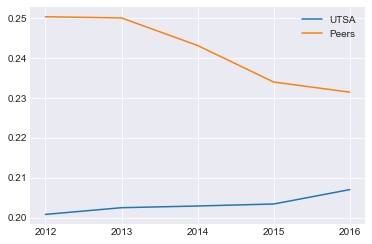

In [30]:
plt.plot(UTSA_ratio['Year'],UTSA_ratio['Ratio'],label='UTSA')
plt.plot(median_ratio['Year'],median_ratio['Ratio'],label='Peers')
plt.legend()

In [31]:
# writer = pd.ExcelWriter('UTSA and Peers.xlsx')
# median_ratio.to_excel(writer,'Median')
# UTSA_ratio.to_excel(writer,'UTSA')
# writer.save()